# Sad TP2

## Library's

In [1]:
import re
import findspark
findspark.init()
from pyspark import *
from pyspark.sql import *

In [2]:
from pyspark.sql.types import DoubleType
from IPython.display import Image

## Configuration

In [3]:
#the configuration dosen't work the spark master still local[*] so i chage the cores of virtual machine manualy
#to change the number of treads
conf= SparkConf().setAppName("TP2").setMaster("local[6]")

In [4]:
conf.getAll()

[('spark.submit.pyFiles',
  '/home/pc1/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,/home/pc1/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'),
 ('spark.files',
  'file:///home/pc1/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///home/pc1/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'),
 ('spark.app.name', 'TP2'),
 ('spark.repl.local.jars',
  'file:///home/pc1/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///home/pc1/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'),
 ('spark.submit.deployMode', 'client'),
 ('spark.jars',
  'file:///home/pc1/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///home/pc1/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.master', 'local[6]')]

# Processing

### Reading file

In [5]:
df = spark.read.option("header",True).option("delimiter", " ").format("csv").load("tp2data/d.csv")

In [6]:
df.printSchema()
df.show(5)

root
 |-- timestamp: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- bytesoriginator: string (nullable = true)
 |-- reponderbytes: string (nullable = true)
 |-- localhost: string (nullable = true)
 |-- remotehost: string (nullable = true)
 |-- state: string (nullable = true)
 |-- flags: string (nullable = true)

+----------------+--------+--------+---------------+-------------+---------+------------+-----+-----+
|       timestamp|duration|protocol|bytesoriginator|reponderbytes|localhost|  remotehost|state|flags|
+----------------+--------+--------+---------------+-------------+---------+------------+-----+-----+
|748162802.427995| 1.24383|    smtp|              ?|            ?|        1|128.97.154.3|  REJ|    L|
|748162802.803033| 3.96513|    smtp|           1173|          328|        3| 128.8.142.5|   SF| null|
|748162804.817224| 1.02839|    nntp|             58|          129|        2|  140.98.2.1|   SF|    L|
|748162812.2

### Computation

1- the most frequent protocol

In [7]:
df.groupby("protocol").count().orderBy("count", ascending=False).first()[0]

'smtp'

2- the most frequent IP Adress

In [8]:
df.groupby("remotehost").count().orderBy("count", ascending=False).first()[0]

'192.35.222.222'

3- the IP address with the largest overall communication duration

In [9]:
#tomporary variable, it will be used to find the ip that have the maximum duration
tmp = df.selectExpr("cast(duration as float) duration","remotehost")

In [10]:
tmp.orderBy("duration", ascending=False).first()["remotehost"]

'146.246.250.28'

4- the IP addresses that initiated more than one type of protocol connections

In [11]:
#tomporary variable
tmp = df.selectExpr("protocol","remotehost").distinct().groupby("protocol").count()

In [12]:
tmp.filter(tmp["count"]> 1).selectExpr("protocol").show(10)

+------------+
|    protocol|
+------------+
|      telnet|
|ftpdata-1475|
|     priv-73|
|  other-2525|
|ftpdata-1748|
|ftpdata-1964|
|ftpdata-1138|
|ftpdata-1725|
|ftpdata-1810|
|  other-2592|
+------------+
only showing top 10 rows



## Experiments

### 1 core

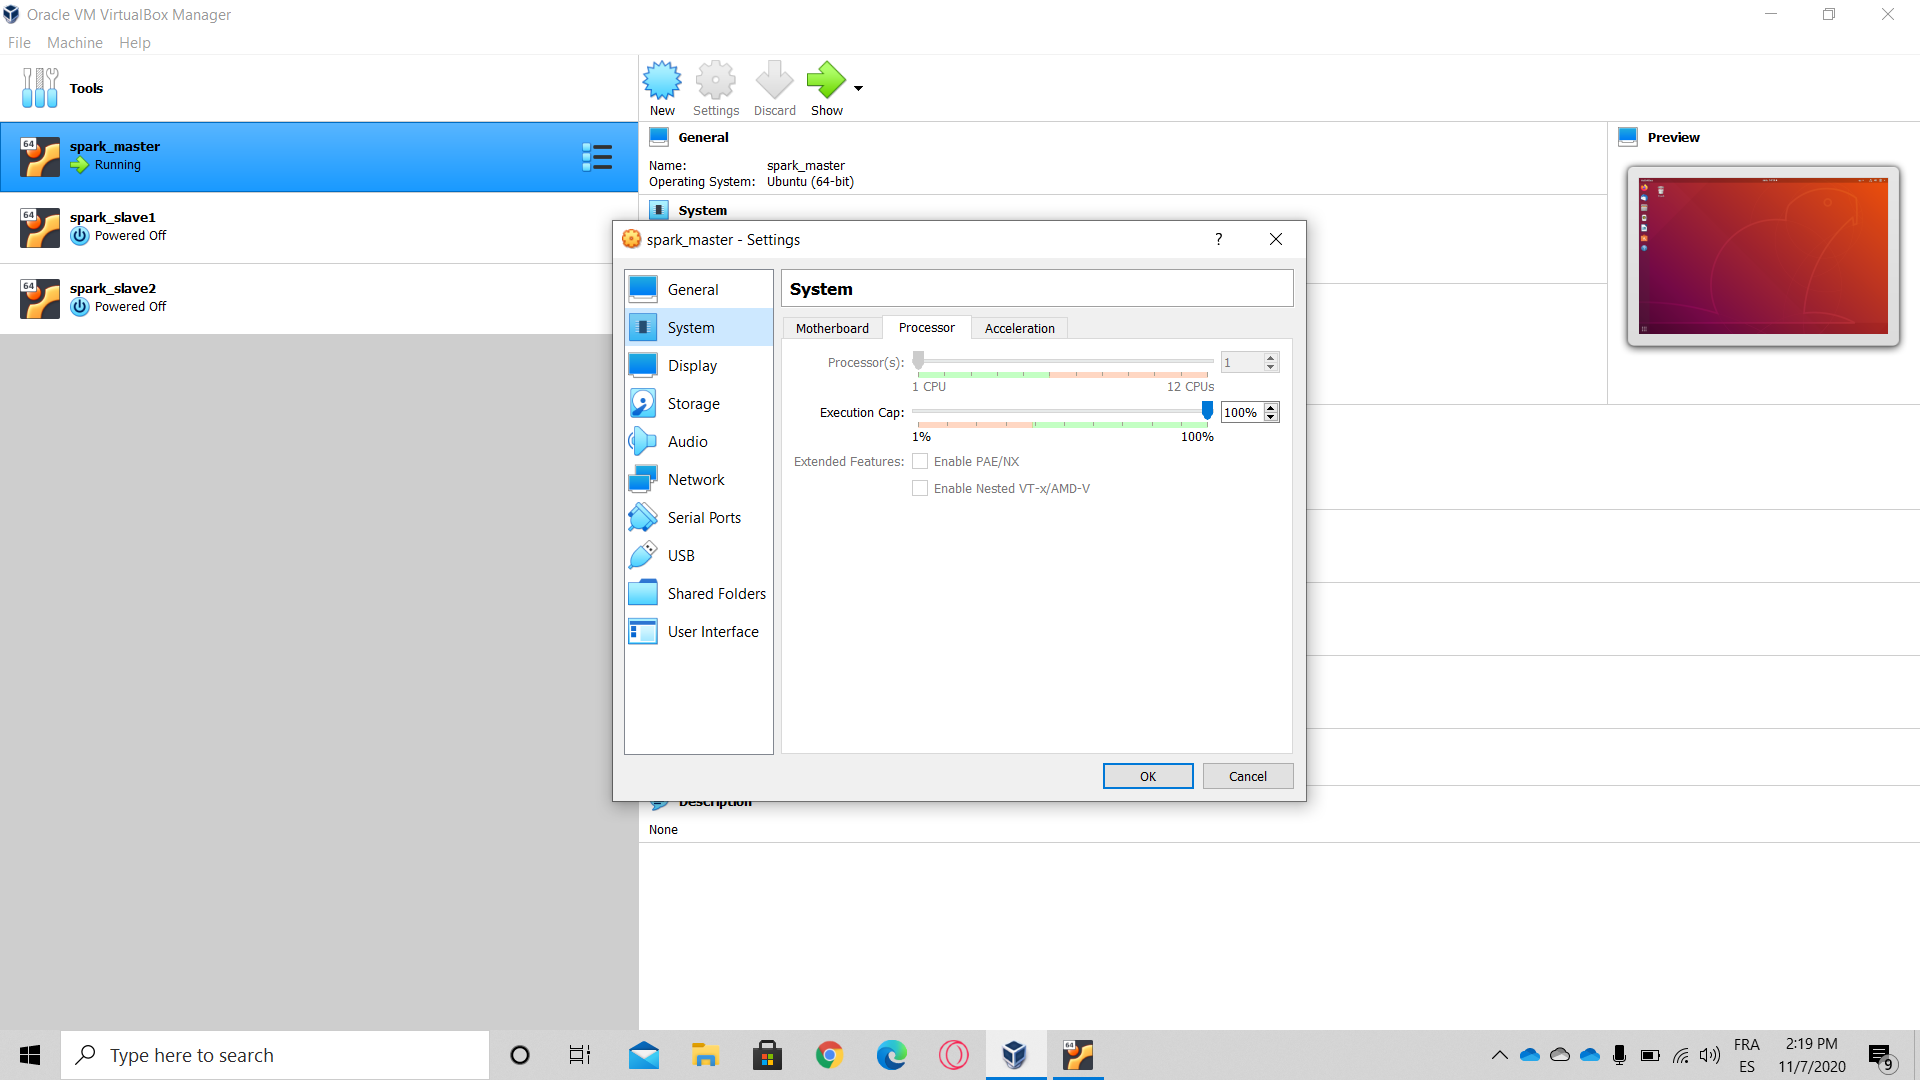

In [13]:
# configuration
Image(filename = "one-core-virtual-machine.png", width = 900, height = 508)

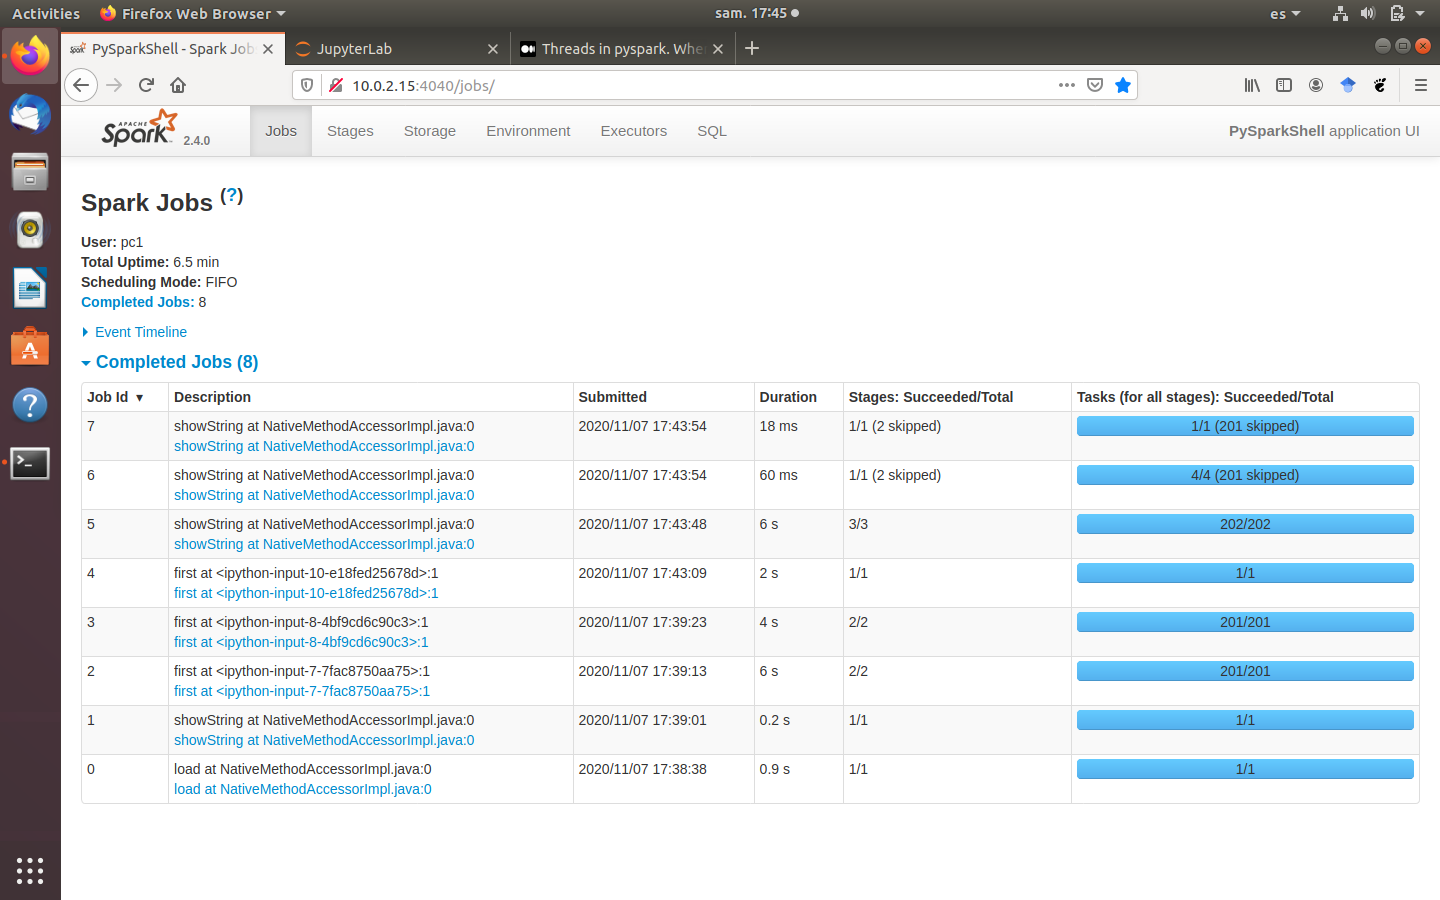

In [14]:
# results
Image(filename = "spark-one-core.png", width = 900, height = 508)

the total time taken by program to finish is : 19.178 s

### 2 cores

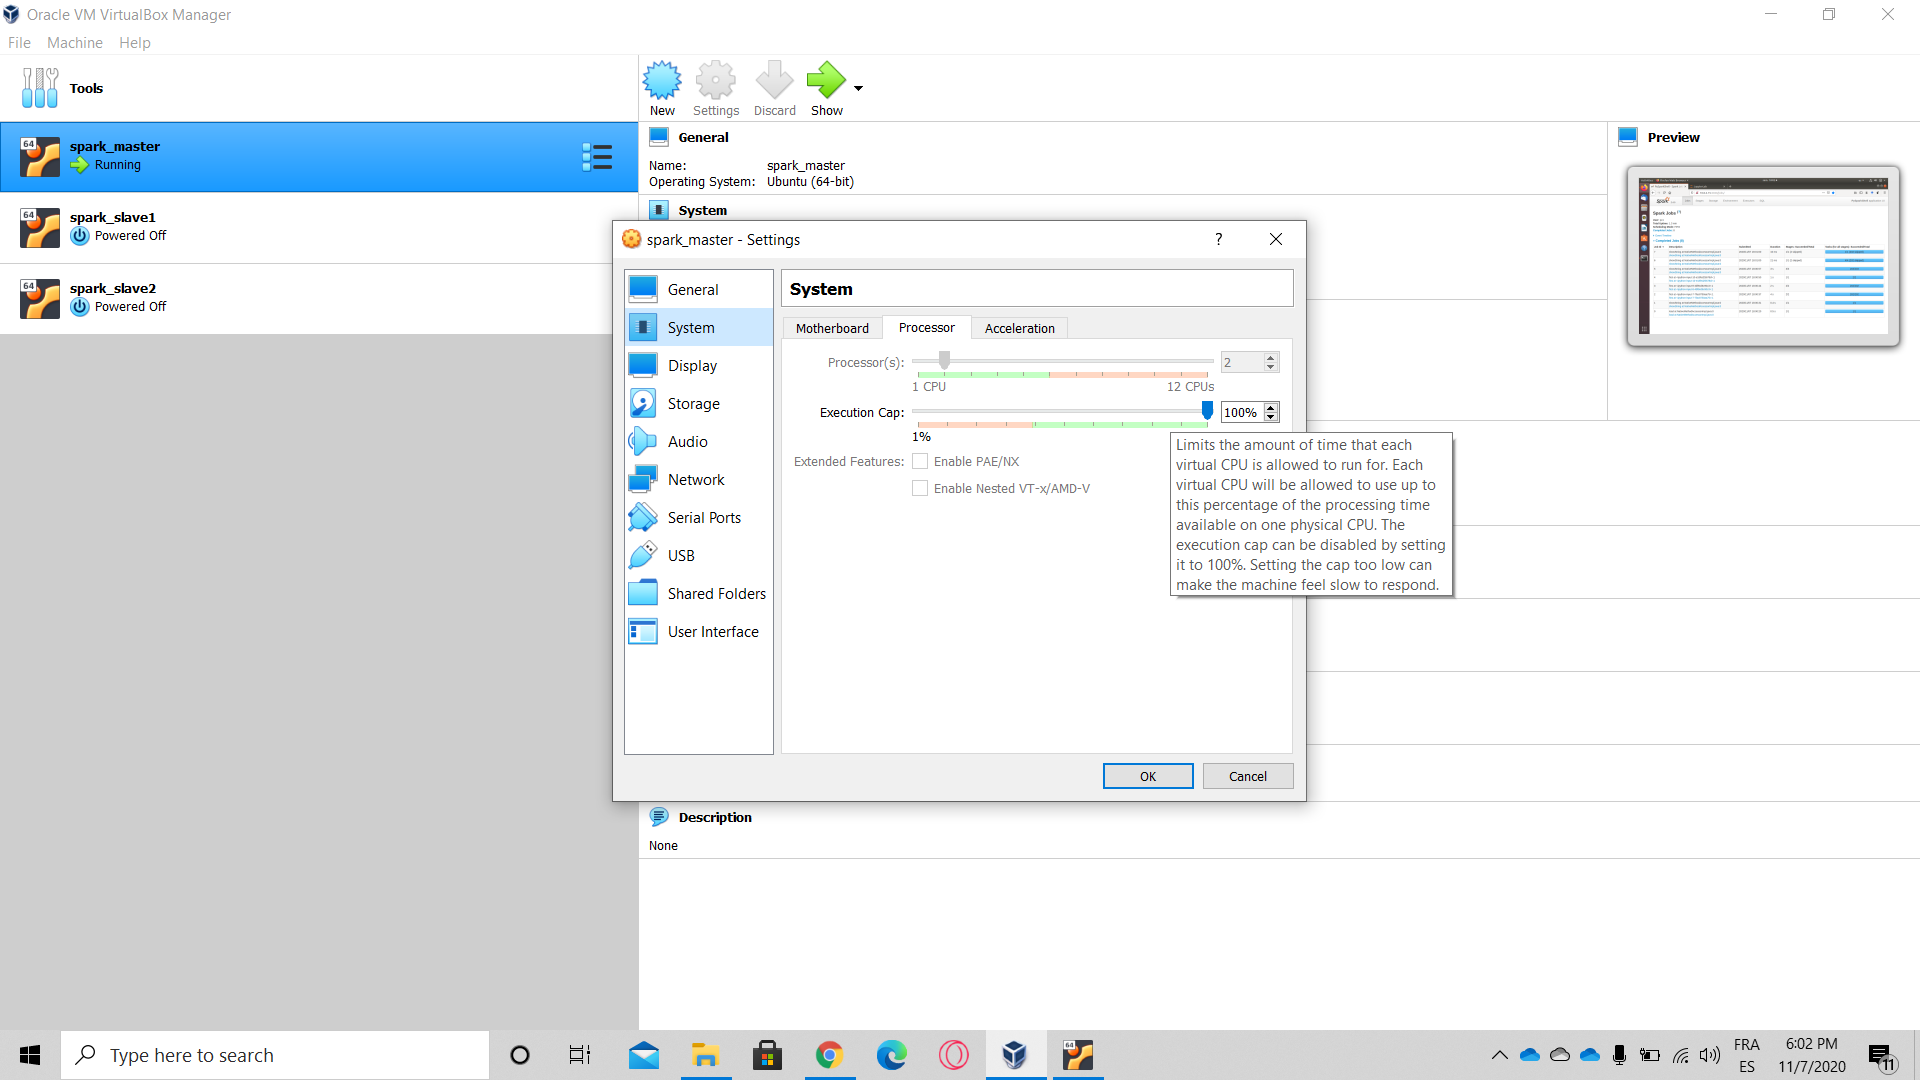

In [19]:
# configuration
Image(filename = "two-cores-virtual-machine.png", width = 900, height = 508)

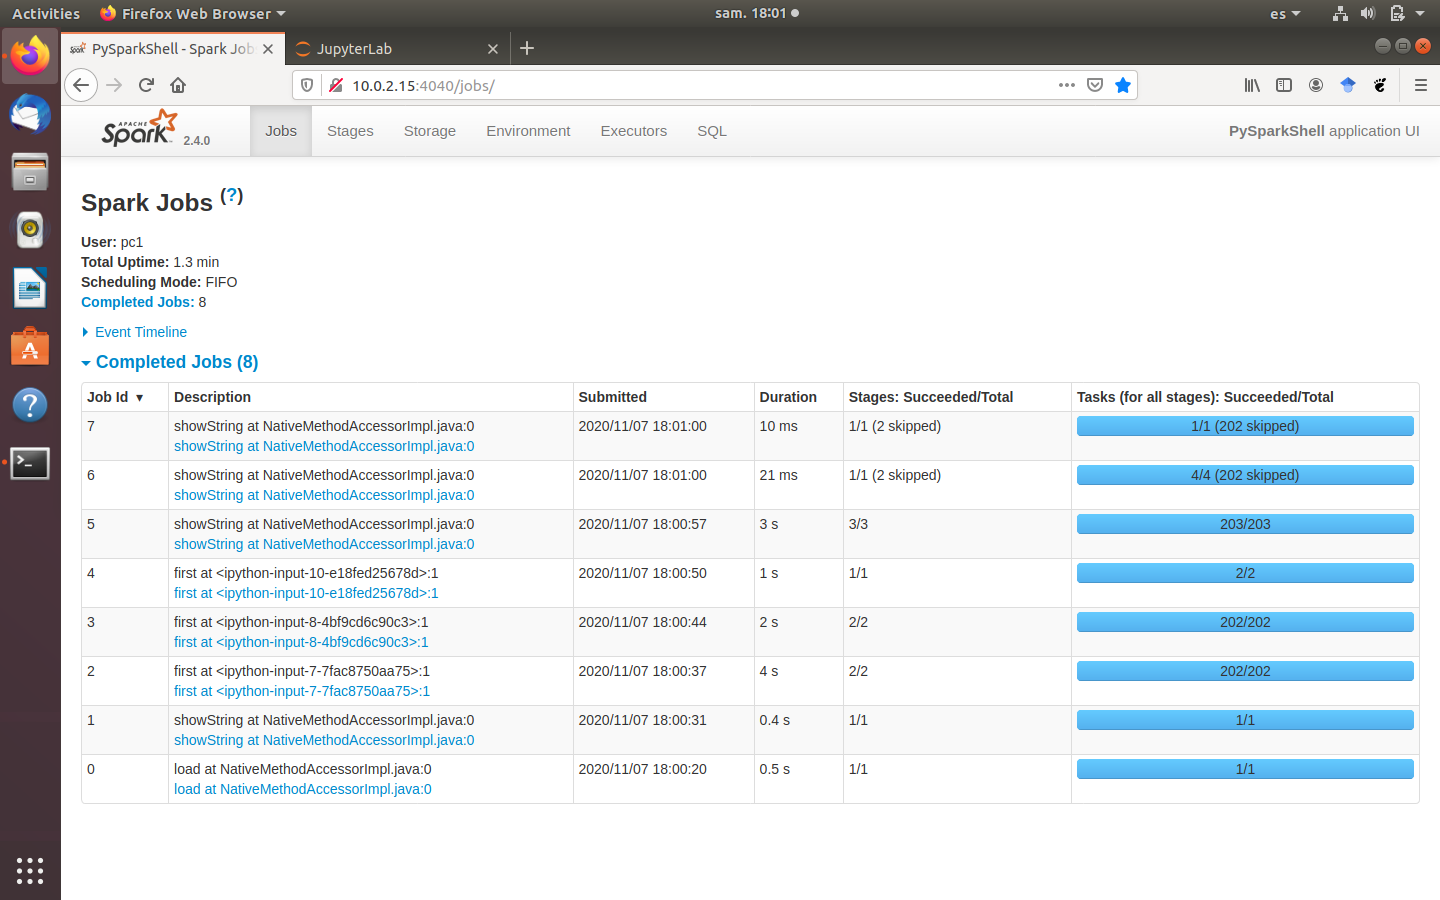

In [18]:
# results
Image(filename = "spark-two-cores.png", width = 900, height = 508)

the total time taken by program to finish is : 10.931 s

### 3 cores

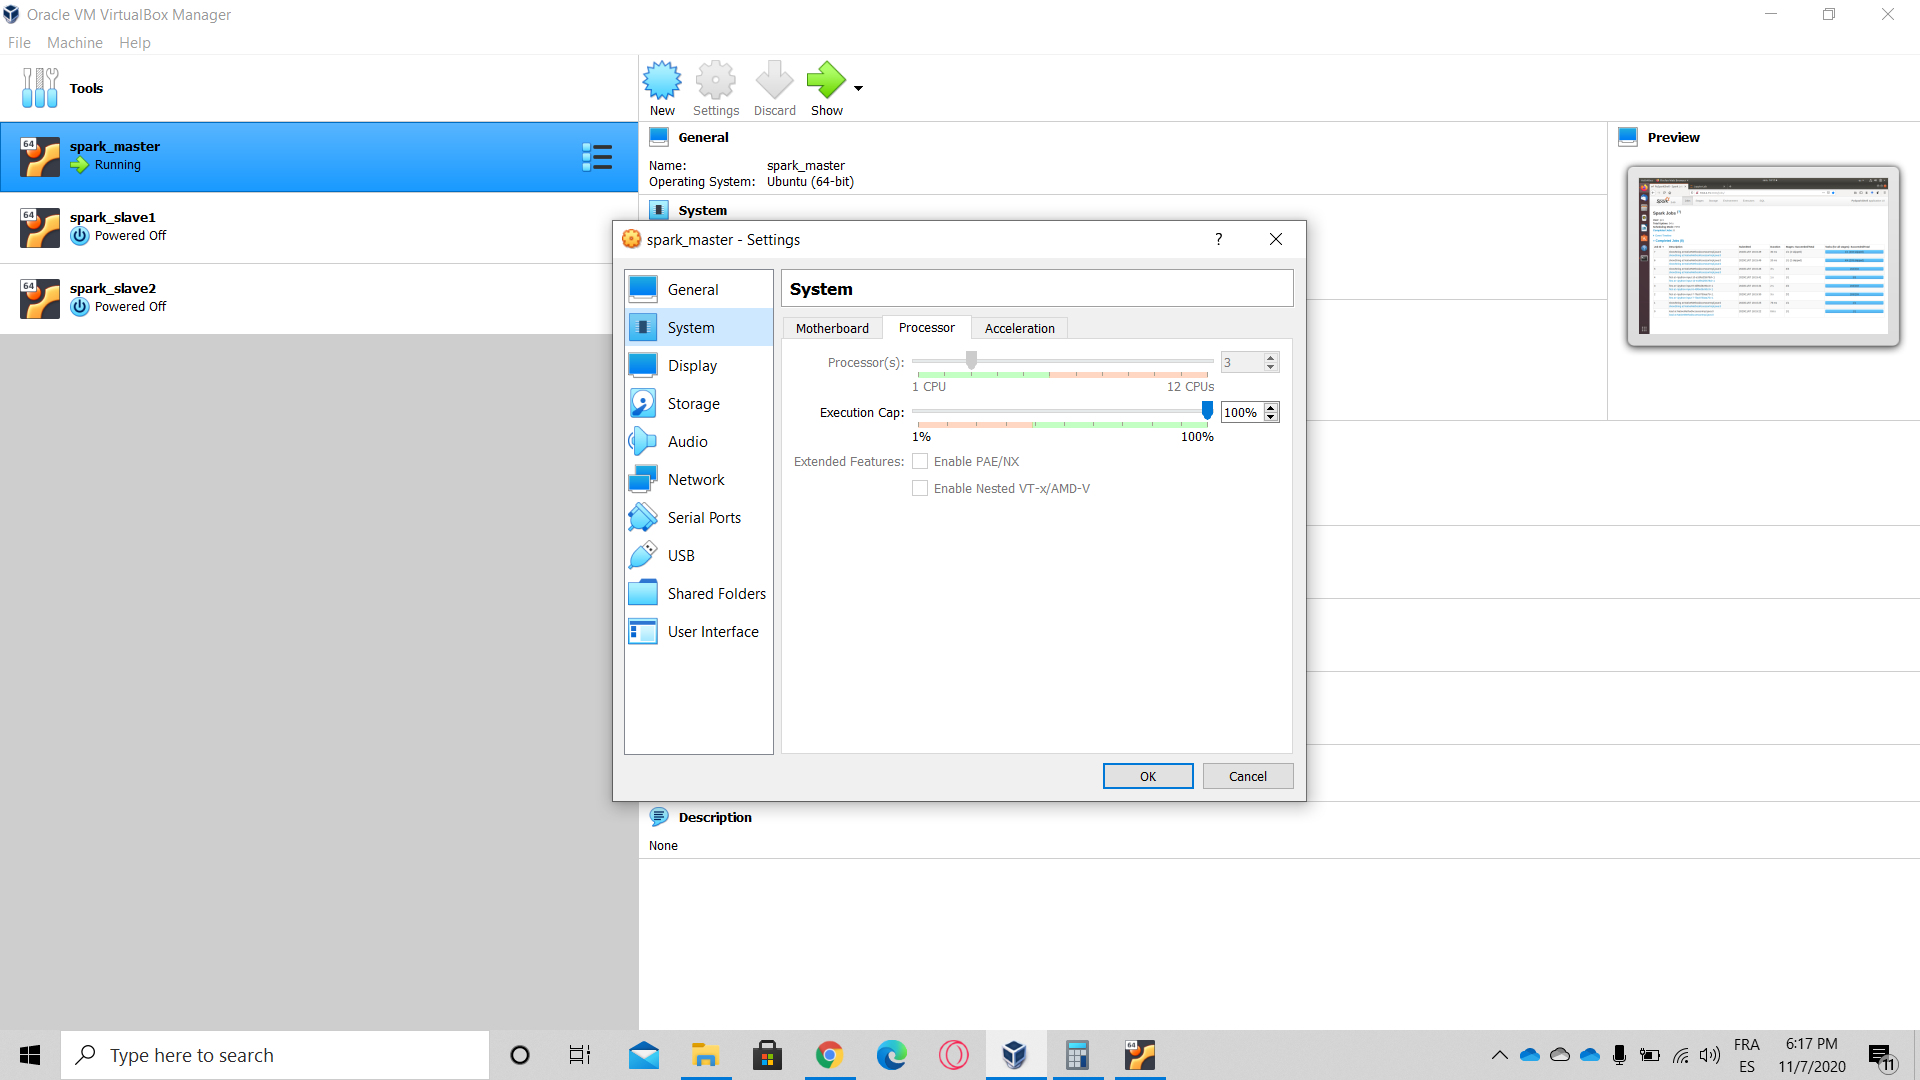

In [18]:
# configuration
Image(filename = "three-cores-virtual-machin.png", width = 900, height = 508)

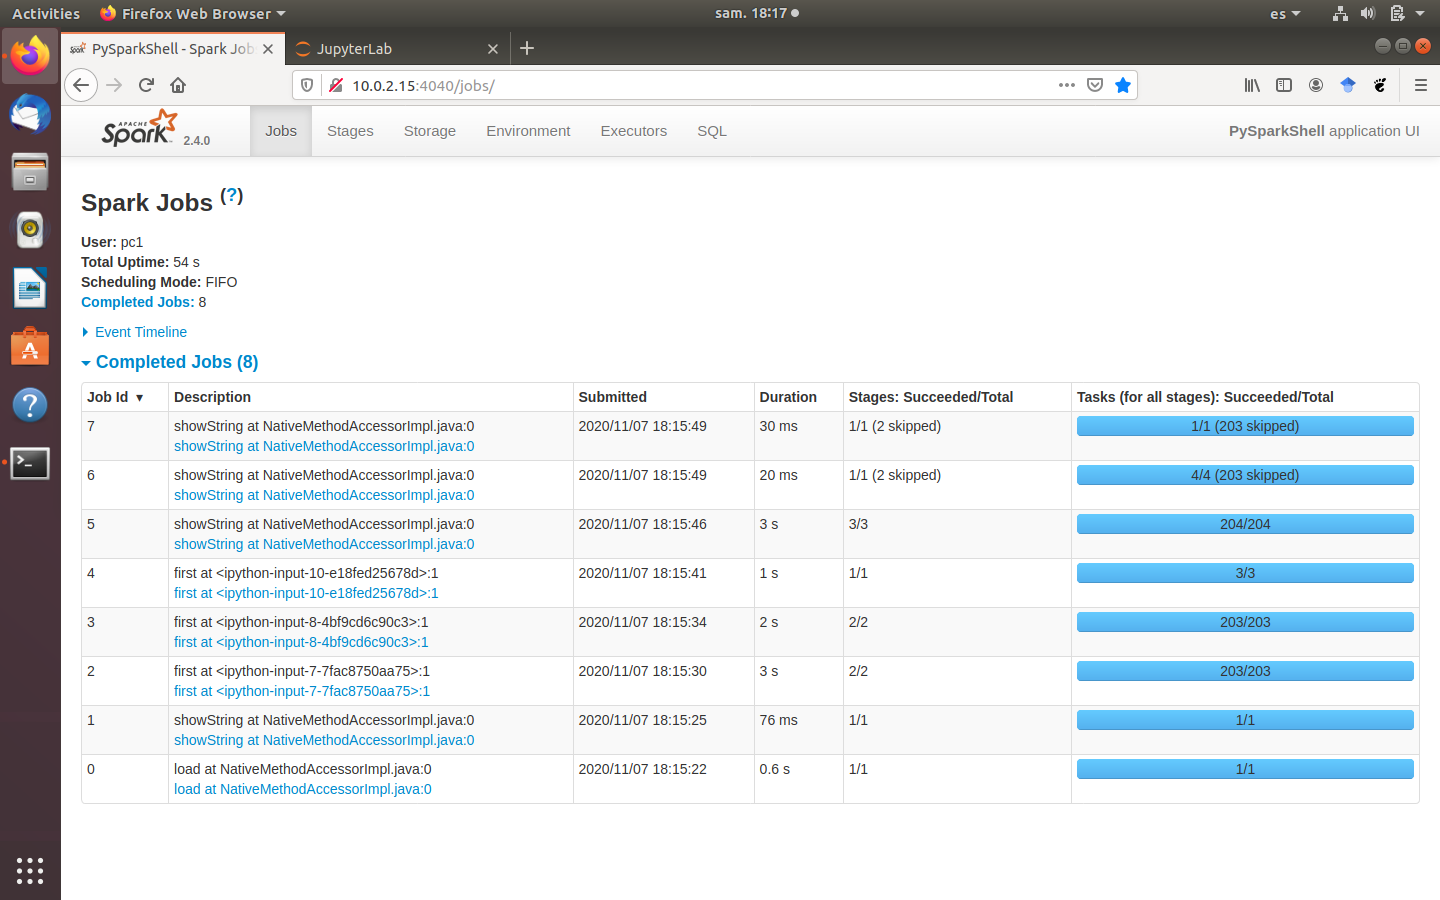

In [17]:
# results
Image(filename = "sparl-three-cores.png", width = 900, height = 508)

the total time taken by program to finish is : 9.726 s

We can notice that the execution time is similar to the previous one

### 4 cores

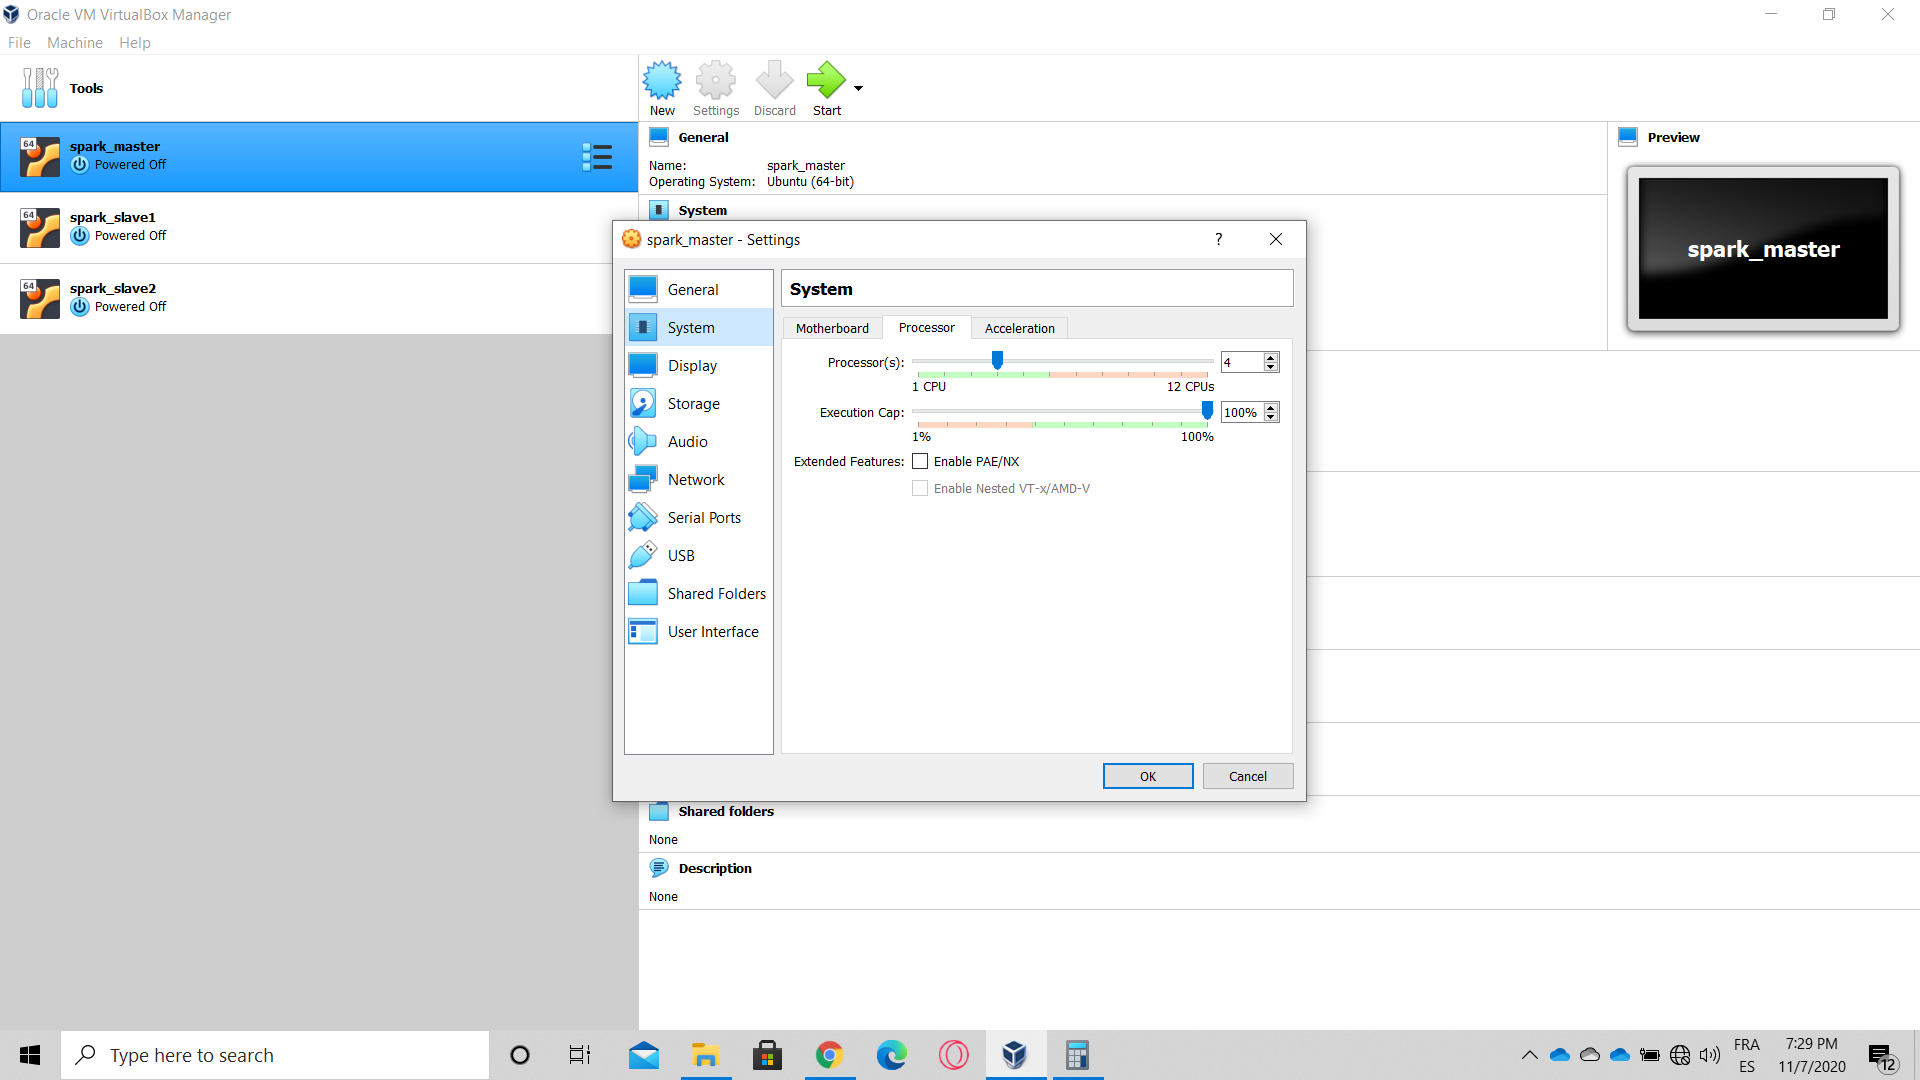

In [16]:
# configuration
Image(filename = "four-cores-virtual-machine.png", width = 900, height = 508)

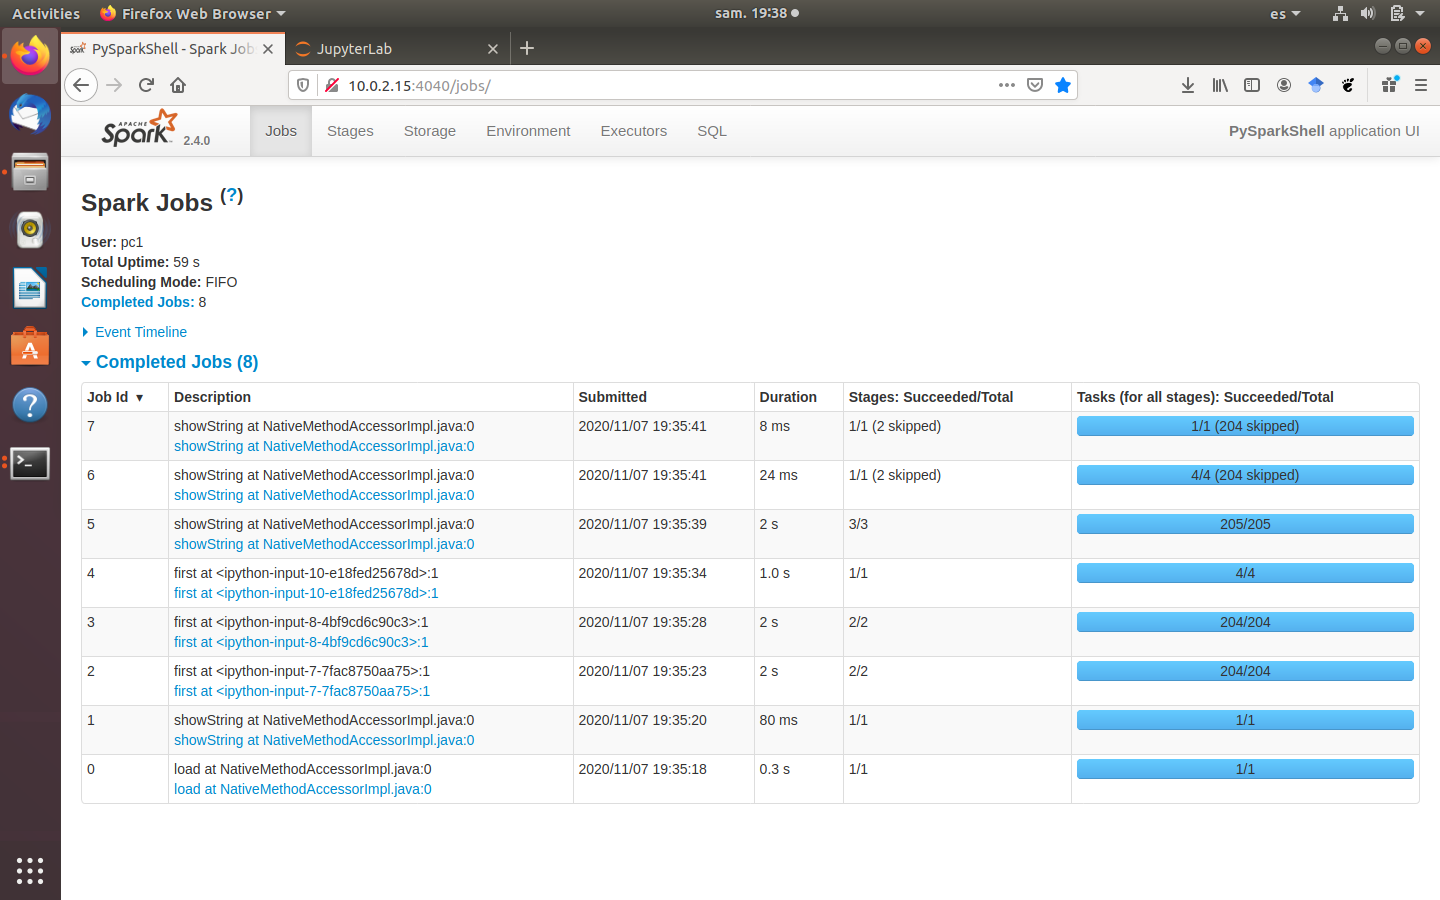

In [18]:
# results
Image(filename = "spark-four-cores.png", width = 900, height = 508)

the total time taken by program to finish is : 9.412 s

## statistics

Text(0.5, 0, 'number of cores/threads')

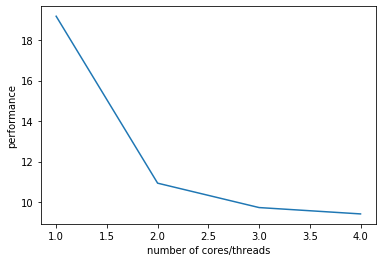

In [25]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [19.178, 10.931, 9.726, 9.412])
plt.ylabel('performance')
plt.xlabel('number of cores/threads')

## summary

The time needed by the program to finish decreases when we increase the number of cores/threads.
Eventhought the execution time is not decreasing with the same amount and almost stay's the same when the number of cores is superiour to 2 cores (p'(2)<p'(3) [wher p' is the derivative of the function above ]), so there is no reason to keep adding cores because spark is set to local[*] and for him ther is no need to increase the number of threads because the volume of data is not big   

unfortunately the spark configuration dosen't work and we cannot force him to use more threads.